# Importing the dependencies

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Data Collection and Processing

In [2]:
calories_df = pd.read_csv('C:/Users/pc/Machine Learning Workspace/Datasets/calories.csv')

In [3]:
calories_df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [4]:
calories_df.tail()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0
14999,11751526,male,63,173.0,79.0,18.0,92.0,40.5,98.0


In [6]:
# checking for missing values
calories_df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [7]:
calories_df.shape

(15000, 9)

In [8]:
# basic info about the data
calories_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [9]:
# checking statistical measures of the data
calories_df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


**Label Encoding**

In [11]:
label_encoder = LabelEncoder()

In [16]:
gender_labels = label_encoder.fit_transform(calories_df.Gender)

In [17]:
calories_df['gender_labels'] = gender_labels

In [18]:
calories_df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,gender_labels
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0,1
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0,0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0,1
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0,0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0,0


# Correlation

In [20]:
correlation = calories_df.select_dtypes(include='number').corr()

<Axes: >

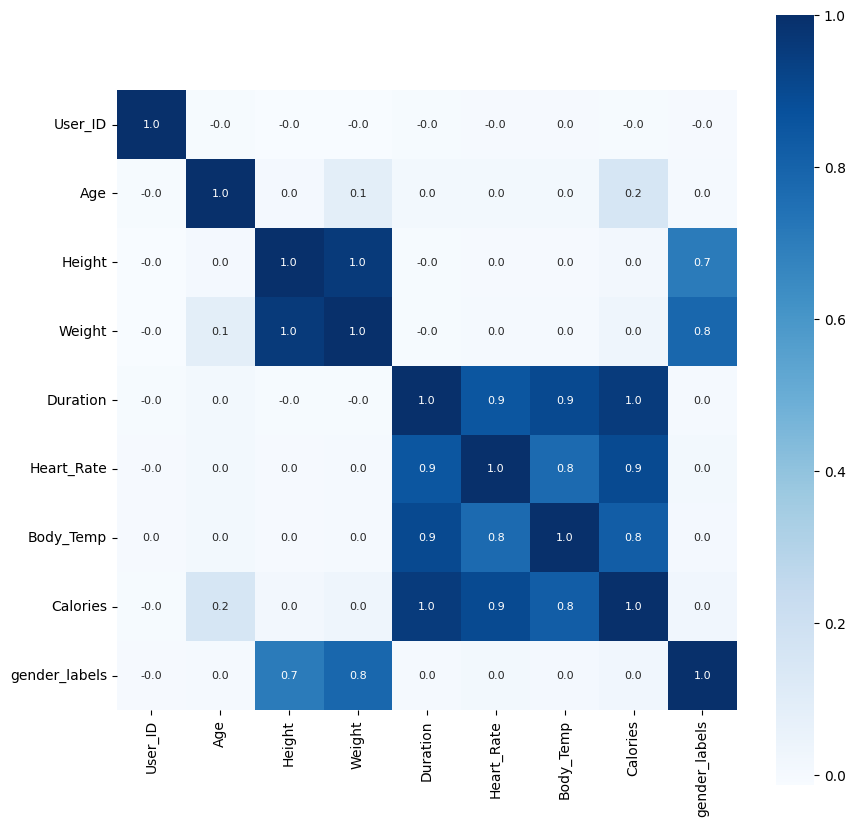

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

# Splitting the features & target

In [26]:
X = calories_df.drop(columns=['Calories','User_ID', 'Gender'], axis=1)

Y = calories_df['Calories']

In [27]:
print(X, '\n', Y)

       Age  Height  Weight  Duration  Heart_Rate  Body_Temp  gender_labels
0       68   190.0    94.0      29.0       105.0       40.8              1
1       20   166.0    60.0      14.0        94.0       40.3              0
2       69   179.0    79.0       5.0        88.0       38.7              1
3       34   179.0    71.0      13.0       100.0       40.5              0
4       27   154.0    58.0      10.0        81.0       39.8              0
...    ...     ...     ...       ...         ...        ...            ...
14995   20   193.0    86.0      11.0        92.0       40.4              0
14996   27   165.0    65.0       6.0        85.0       39.2              0
14997   43   159.0    58.0      16.0        90.0       40.1              0
14998   78   193.0    97.0       2.0        84.0       38.3              1
14999   63   173.0    79.0      18.0        92.0       40.5              1

[15000 rows x 7 columns] 
 0        231.0
1         66.0
2         26.0
3         71.0
4         35

# Splitting into training & testing data

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

In [29]:
X_train, X_test, Y_train, Y_test

(       Age  Height  Weight  Duration  Heart_Rate  Body_Temp  gender_labels
 14145   70   155.0    58.0       4.0        87.0       38.9              0
 13071   78   189.0    84.0      10.0        85.0       40.0              0
 10444   21   161.0    58.0       8.0        88.0       39.9              0
 7885    30   146.0    52.0      13.0        95.0       39.9              0
 7796    27   188.0    87.0      14.0       100.0       40.2              1
 ...    ...     ...     ...       ...         ...        ...            ...
 5699    75   174.0    76.0      18.0       101.0       40.5              0
 10742   60   174.0    68.0      18.0        97.0       40.1              0
 537     53   199.0    98.0      14.0        92.0       40.4              1
 9412    23   179.0    71.0      18.0       102.0       40.6              0
 12463   23   158.0    57.0      14.0        94.0       40.4              0
 
 [12000 rows x 7 columns],
       Age  Height  Weight  Duration  Heart_Rate  Body_Temp

# Model Training

In [30]:
regressor = RandomForestRegressor()

In [31]:
regressor.fit(X_train, Y_train)

RandomForestRegressor()

# Model Evaluation

In [32]:
test_data_prediction = regressor.predict(X_test)

In [33]:
print(test_data_prediction)

[162.37  50.81 258.79 ...  30.46  14.58 146.88]


In [37]:
R_sqaured_error = metrics.r2_score(test_data_prediction, Y_test)

print(f"R Squared error: {R_sqaured_error}")

R Squared error: 0.9975500535568735


# Actual Values vs Predicted values

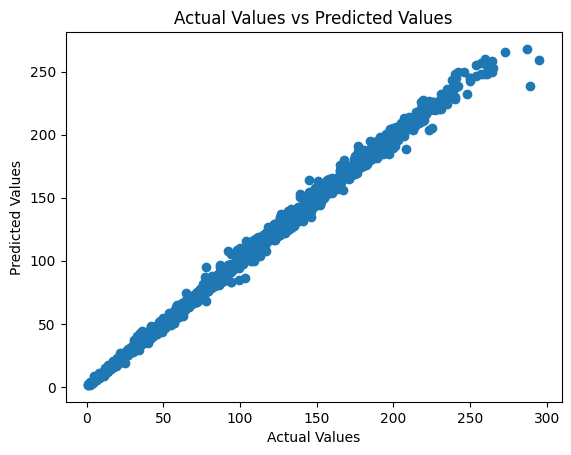

In [38]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual Values vs Predicted Values')
plt.show()